# Unemployment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import plotly.express as px


### Load and Understand the Dataset

In [10]:
df = pd.read_csv("unemployment_data.csv")

In [11]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [12]:
df.shape

(267, 9)

In [13]:
df.columns 

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [14]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [16]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [18]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
62,Gujarat,31-03-2020,M,6.66,23566641,47.75,West,22.2587,71.1924
104,Jharkhand,30-06-2020,M,20.95,8622722,40.59,East,23.6102,85.2799
224,Telangana,31-08-2020,M,5.79,18185429,60.59,South,18.1124,79.0193
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.8550
87,Himachal Pradesh,31-08-2020,M,15.79,2029740,39.42,North,31.1048,77.1734


In [19]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [22]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.nunique()

Region                                       27
 Date                                        10
 Frequency                                    1
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
dtype: int64

###  Clean the Data

In [27]:

print(df.columns.tolist())


['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [28]:
# Step 1: Strip extra spaces from all column names
df.columns = df.columns.str.strip()

# Step 2: Rename column for ease of use
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate'
}, inplace=True)

# Step 3: Convert Date column with correct format (dayfirst=True for DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Step 4: Drop rows where Date or Unemployment Rate is missing
df = df.dropna(subset=['Date', 'Unemployment Rate'])

# (Optional) Preview cleaned data
print(df.head())


           Region       Date Frequency  Unemployment Rate  Estimated Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48            16635535   
1  Andhra Pradesh 2020-02-29         M               5.83            16545652   
2  Andhra Pradesh 2020-03-31         M               5.79            15881197   
3  Andhra Pradesh 2020-04-30         M              20.51            11336911   
4  Andhra Pradesh 2020-05-31         M              17.43            12988845   

   Estimated Labour Participation Rate (%) Region.1  longitude  latitude  
0                                    41.02    South    15.9129     79.74  
1                                    40.90    South    15.9129     79.74  
2                                    39.18    South    15.9129     79.74  
3                                    33.10    South    15.9129     79.74  
4                                    36.46    South    15.9129     79.74  


## Exploratory Data Analysis (EDA)

 Unemployment Over Time

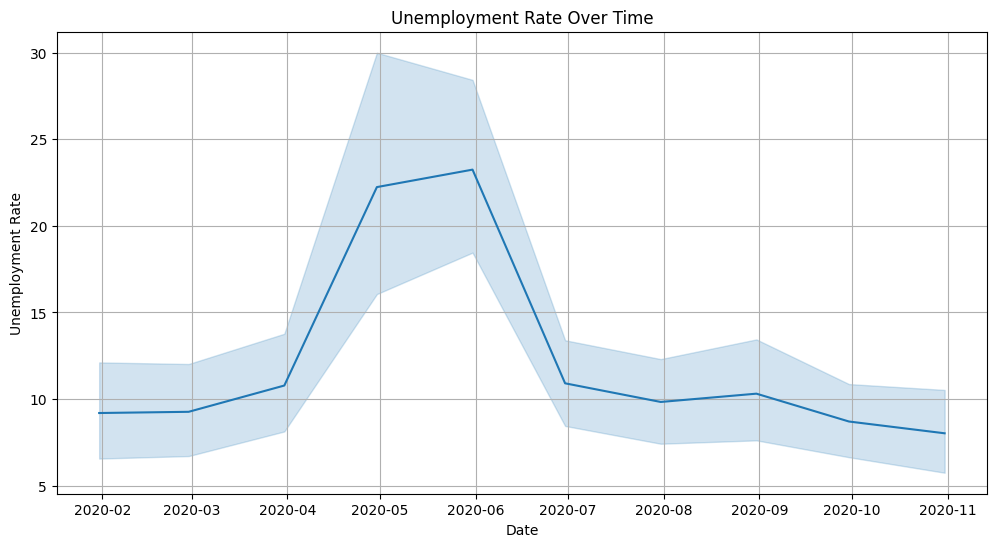

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment Rate')
plt.title("Unemployment Rate Over Time")
plt.grid(True)
plt.show()


Regional Comparison

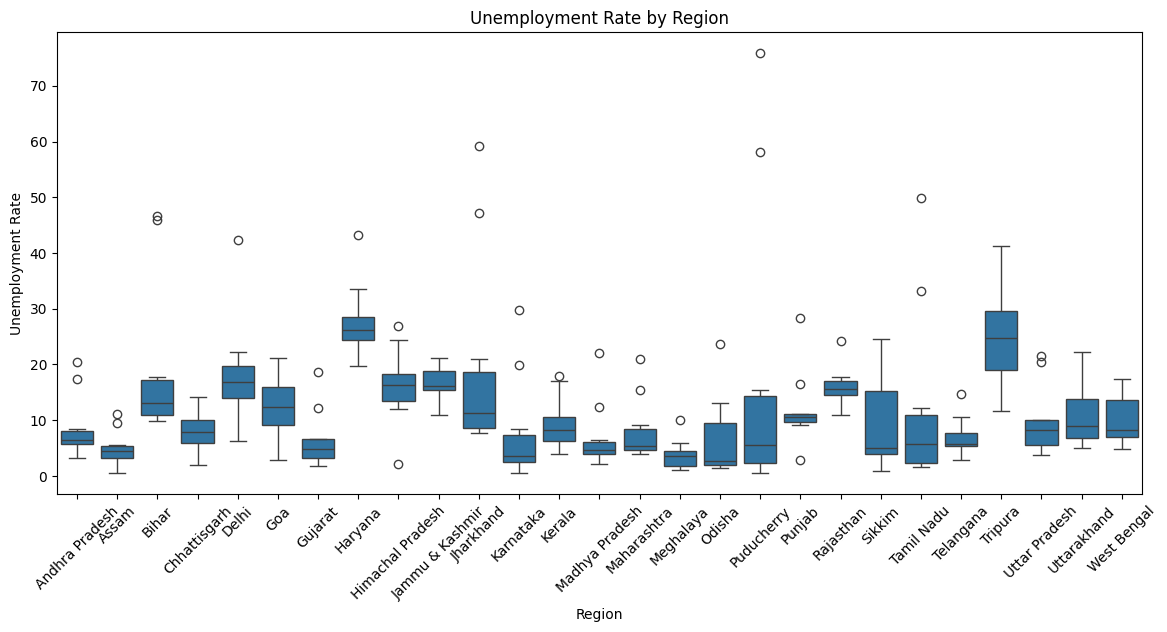

In [30]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Region', y='Unemployment Rate')
plt.title("Unemployment Rate by Region")
plt.xticks(rotation=45)
plt.show()


Choropleth Map

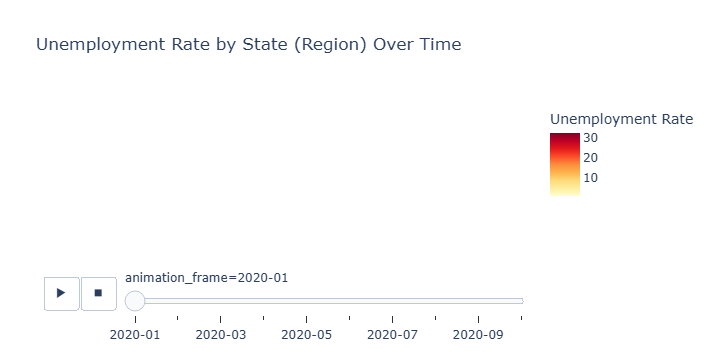

In [32]:

fig = px.choropleth(
    df,
    locations='Region',  # likely Indian states
    locationmode='country names',  # use 'geojson-id' if you switch to geojson later
    color='Unemployment Rate',
    hover_name='Region',  # match existing column
    animation_frame=df['Date'].dt.strftime('%Y-%m'),  # simplify date format for animation
    title='Unemployment Rate by State (Region) Over Time',
    color_continuous_scale='YlOrRd',
    scope='asia'  # optionally limit map scope
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Bargarph

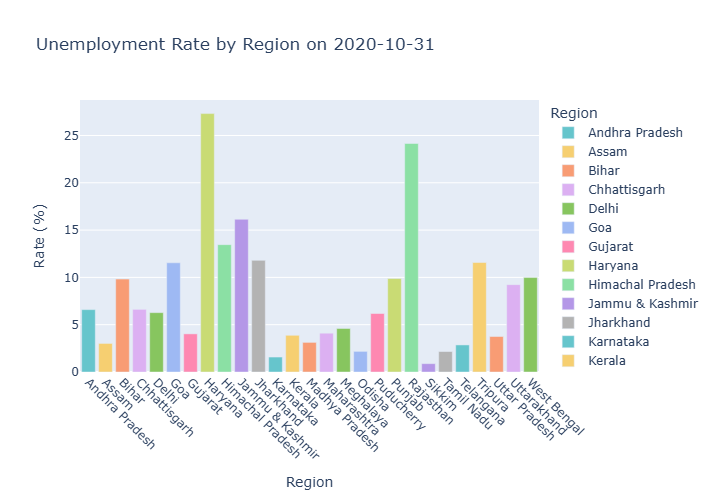

In [36]:

selected_date = df['Date'].max().date()  
df_bar = df[df['Date'].dt.date == selected_date]

fig_bar = px.bar(
    df_bar,
    x='Region',
    y='Unemployment Rate',
    color='Region',
    title=f'Unemployment Rate by Region on {selected_date}',
    labels={'Unemployment Rate': 'Rate (%)'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_bar.update_layout(
    xaxis_tickangle=45,
    height=500
)

fig_bar.show()



### COVID-19 Impact Analysis

In [37]:
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

print("Pre-COVID Avg:", pre_covid['Unemployment Rate'].mean())
print("Post-COVID Avg:", post_covid['Unemployment Rate'].mean())


Pre-COVID Avg: 9.231346153846154
Post-COVID Avg: 12.963860465116278


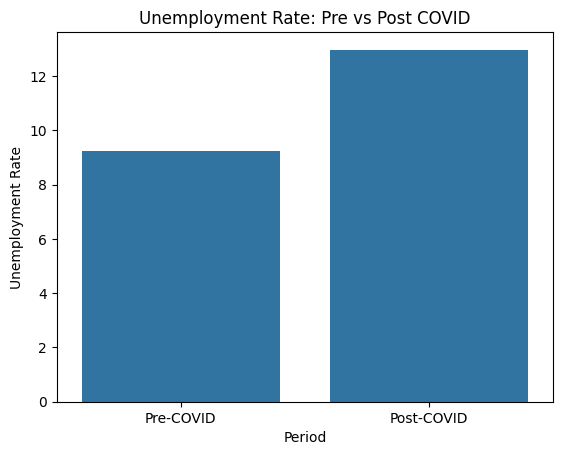

In [38]:
comparison_df = pd.DataFrame({
    "Period": ["Pre-COVID", "Post-COVID"],
    "Unemployment Rate": [pre_covid['Unemployment Rate'].mean(),
                          post_covid['Unemployment Rate'].mean()]
})

sns.barplot(x="Period", y="Unemployment Rate", data=comparison_df)
plt.title("Unemployment Rate: Pre vs Post COVID")
plt.show()


### Monthly Seasonal Trends

Text(0, 0.5, 'Unemployment Rate (%)')

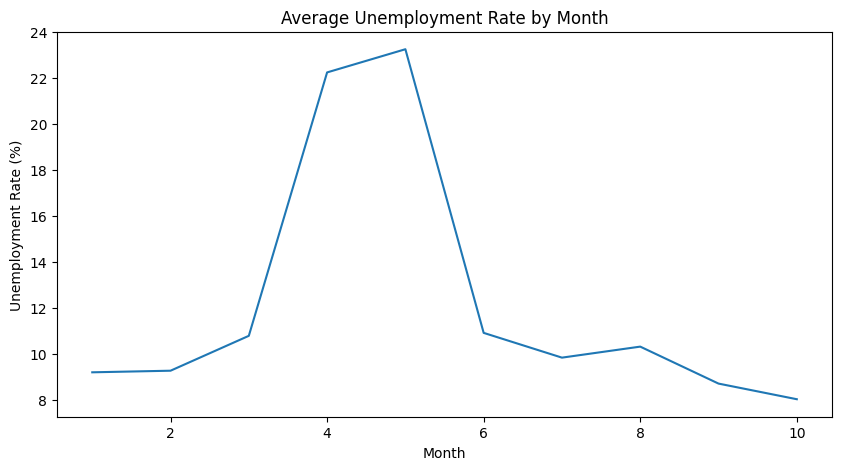

In [39]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Unemployment Rate'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")


## Forecasting Models

Prophet Forecasting

22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:22 - cmdstanpy - INFO - Chain [1] done processing


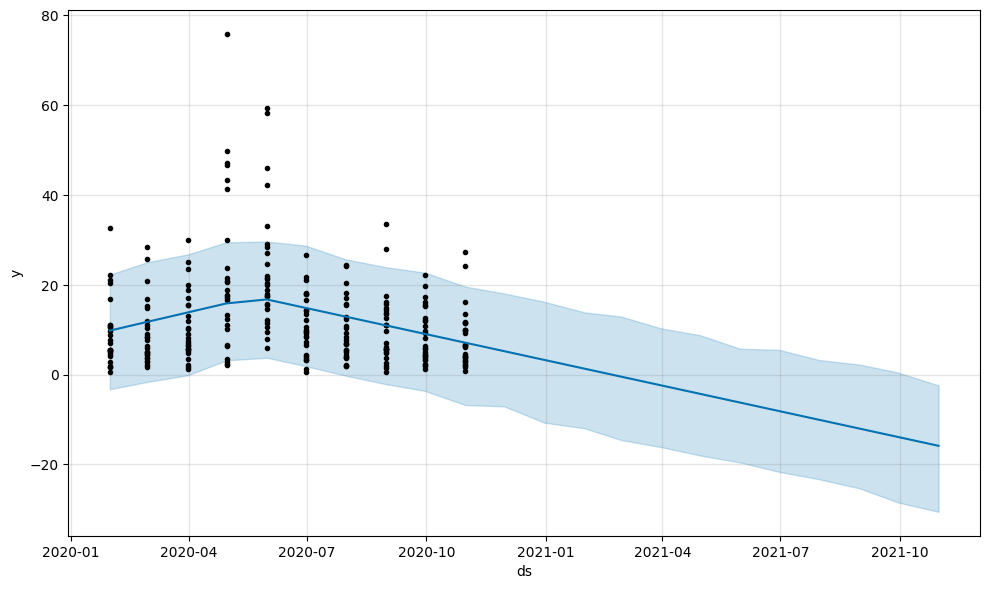

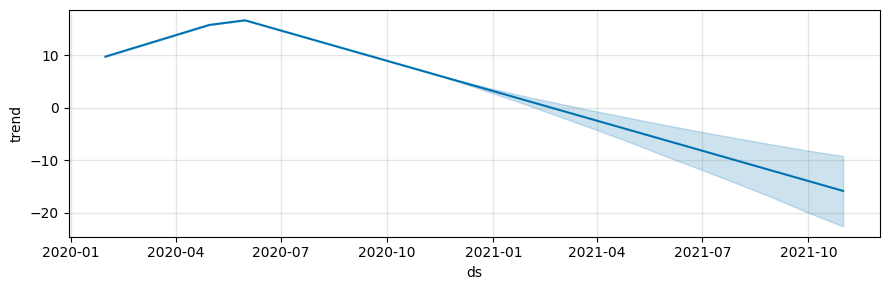

In [43]:
from prophet import Prophet

df_prophet = df[['Date', 'Unemployment Rate']].rename(columns={'Date': 'ds', 'Unemployment Rate': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
import joblib

df['Time'] = range(len(df))
X = df[['Month', 'Time']]
y = df['Unemployment Rate']

model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Predict future
future_time = range(len(df), len(df)+12)
future_months = [(m % 12) + 1 for m in future_time]
X_future = pd.DataFrame({'Month': future_months, 'Time': future_time})
future_preds = model_rf.predict(X_future)

# Save model
joblib.dump(model_rf, 'rf_model.pkl')


['rf_model.pkl']